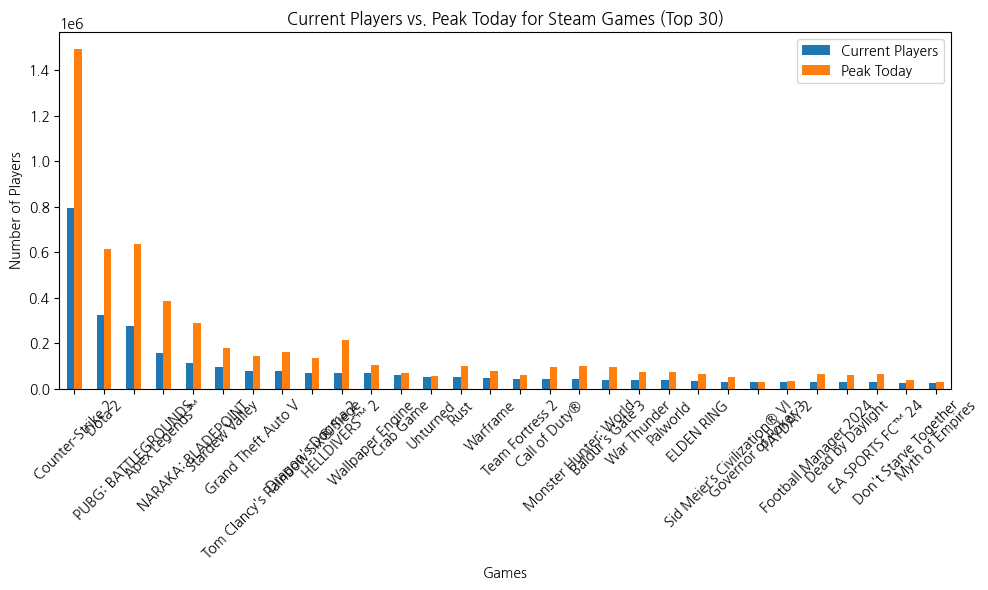

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 처음부터 30번째 행까지의 데이터를 읽어옵니다.
df = pd.read_csv('steam_games.csv', nrows=30)

# 게임 이름을 인덱스로 설정합니다.
df.set_index('Game Name', inplace=True)

# 현재 플레이어 수와 오늘의 최대 플레이어 수를 숫자로 변환합니다.
df['Current Players'] = df['Current Players'].str.replace(',', '').astype(int)
df['Peak Today'] = df['Peak Today'].str.replace(',', '').astype(int)

# 막대 그래프를 그립니다.
df.plot(kind='bar', figsize=(10, 6))
plt.title('Current Players vs. Peak Today for Steam Games (Top 30)')
plt.xlabel('Games')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## CLUSTERMAP

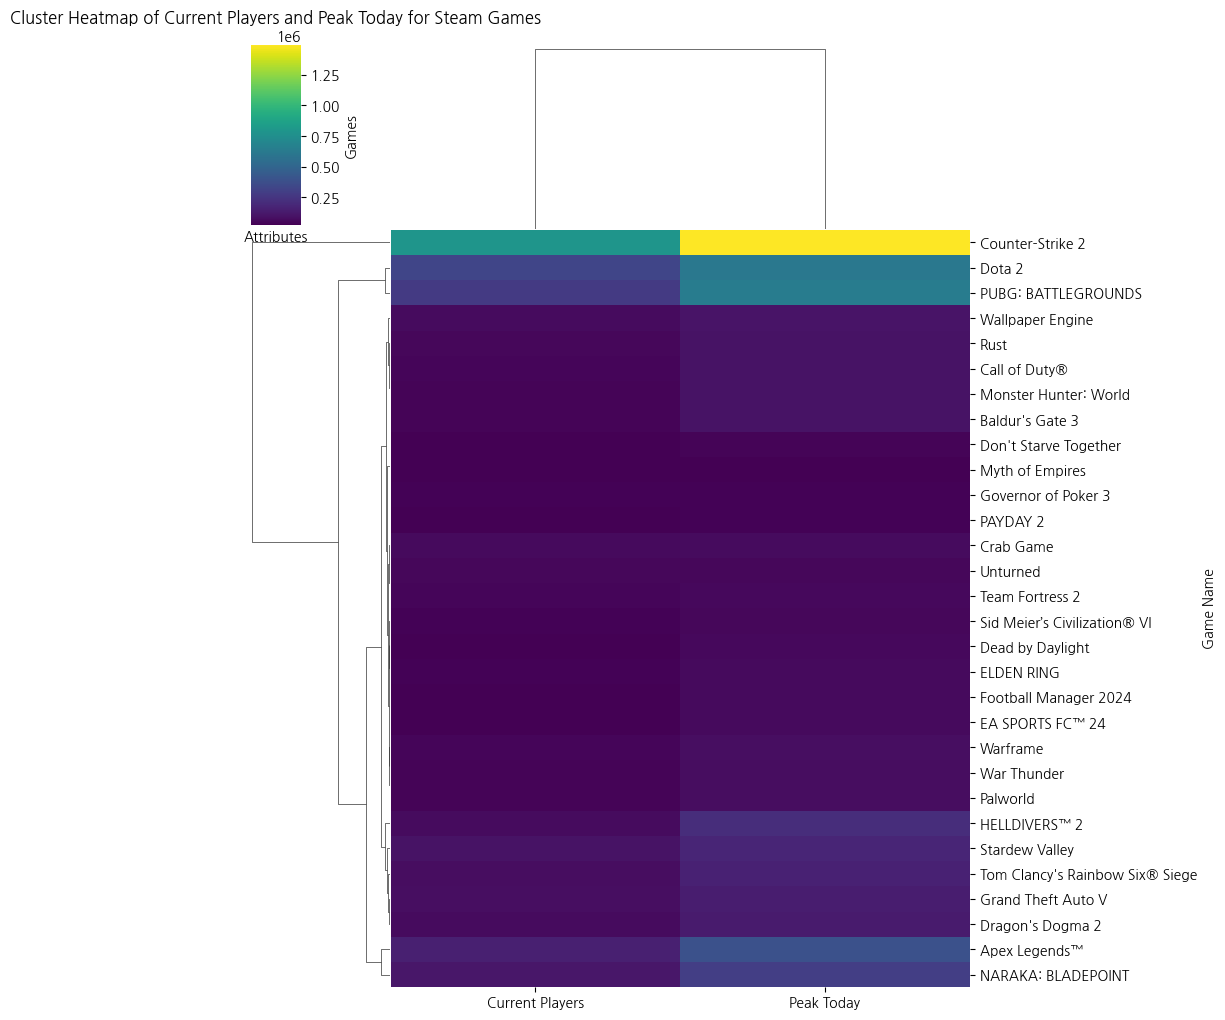

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일에서 데이터를 읽어옵니다.
df = pd.read_csv('steam_games.csv', nrows=30)

# 게임 이름을 인덱스로 설정합니다.
df.set_index('Game Name', inplace=True)

# 현재 플레이어 수와 오늘의 최대 플레이어 수를 숫자로 변환합니다.
df['Current Players'] = df['Current Players'].str.replace(',', '').astype(int)
df['Peak Today'] = df['Peak Today'].str.replace(',', '').astype(int)

# 클러스터 히트맵을 그립니다.
sns.clustermap(df, cmap='viridis', figsize=(10, 10))
plt.title('Cluster Heatmap of Current Players and Peak Today for Steam Games')
plt.xlabel('Attributes')
plt.ylabel('Games')
plt.show()

## HEATMAP

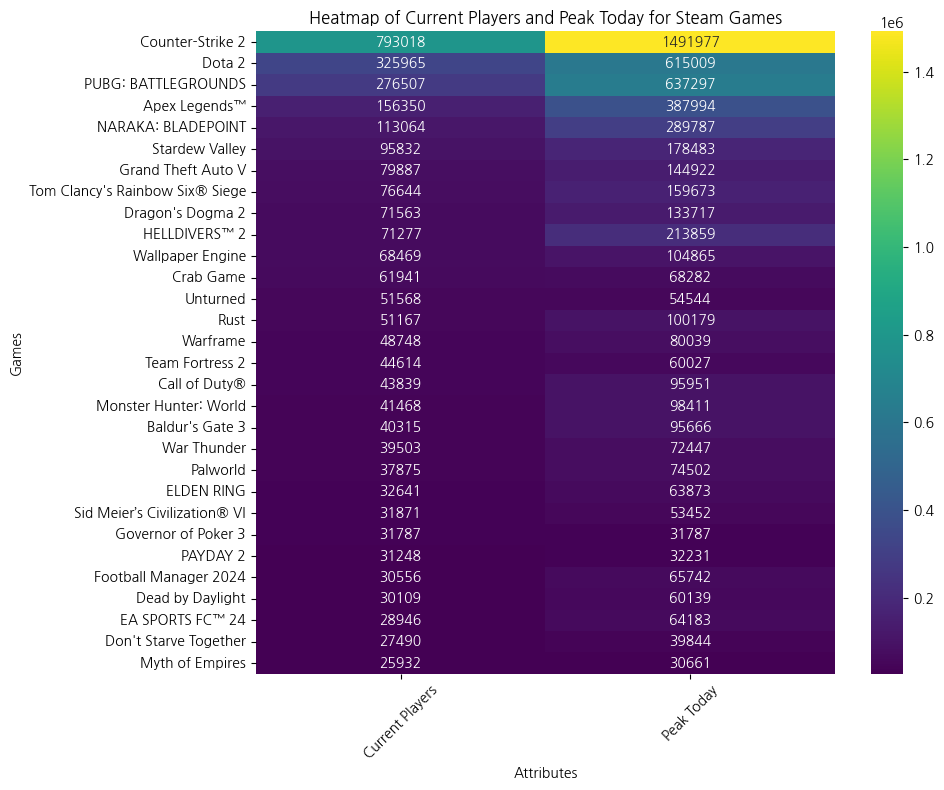

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일에서 데이터를 읽어옵니다.
df = pd.read_csv('steam_games.csv', nrows=30)

# 데이터프레임의 'Game Name' 열을 인덱스로 설정합니다.
df.set_index('Game Name', inplace=True)

# 'Current Players'와 'Peak Today' 열의 데이터 타입을 숫자로 변환합니다.
df['Current Players'] = df['Current Players'].str.replace(',', '').astype(int)
df['Peak Today'] = df['Peak Today'].str.replace(',', '').astype(int)

# 히트맵을 그립니다.
plt.figure(figsize=(10, 8))
sns.heatmap(df, cmap='viridis', annot=True, fmt="d")
plt.title('Heatmap of Current Players and Peak Today for Steam Games')
plt.xlabel('Attributes')
plt.ylabel('Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## FACET GRID

<>:7: SyntaxWarning: invalid escape sequence '\J'
<>:8: SyntaxWarning: invalid escape sequence '\K'
<>:7: SyntaxWarning: invalid escape sequence '\J'
<>:8: SyntaxWarning: invalid escape sequence '\K'
C:\Users\MSI\AppData\Local\Temp\ipykernel_22284\1861683587.py:7: SyntaxWarning: invalid escape sequence '\J'
  jyj_data = pd.read_csv('..\JYJ\steam_games_TopSeller_bak.csv', nrows=30)
C:\Users\MSI\AppData\Local\Temp\ipykernel_22284\1861683587.py:8: SyntaxWarning: invalid escape sequence '\K'
  ksh_data = pd.read_csv('..\KSH\youtube_games.csv')


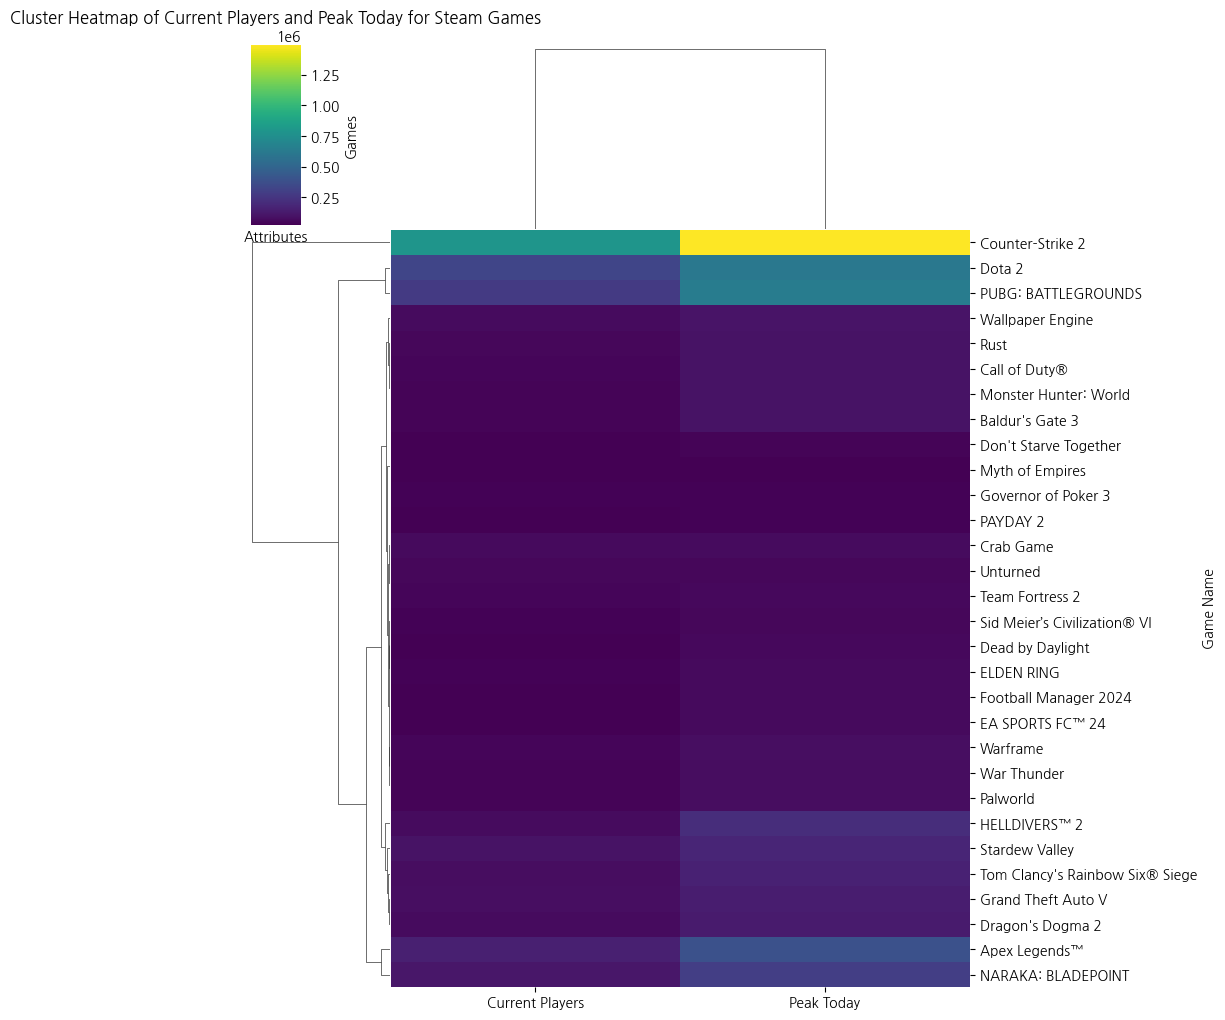

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일에서 데이터를 읽어옵니다.
jmk_data = pd.read_csv('steam_games.csv', nrows=30)
jyj_data = pd.read_csv('..\JYJ\steam_games_TopSeller_bak.csv', nrows=30)
ksh_data = pd.read_csv('..\KSH\youtube_games.csv')

# 게임 이름을 인덱스로 설정합니다.
jmk_data.set_index('Game Name', inplace=True)

# 현재 플레이어 수와 오늘의 최대 플레이어 수를 숫자로 변환합니다.
jmk_data['Current Players'] = jmk_data['Current Players'].str.replace(',', '').astype(int)
jmk_data['Peak Today'] = jmk_data['Peak Today'].str.replace(',', '').astype(int)

# 클러스터 히트맵을 그립니다.
sns.clustermap(jmk_data, cmap='viridis', figsize=(10, 10))
plt.title('Cluster Heatmap of Current Players and Peak Today for Steam Games')
plt.xlabel('Attributes')
plt.ylabel('Games')
plt.show()



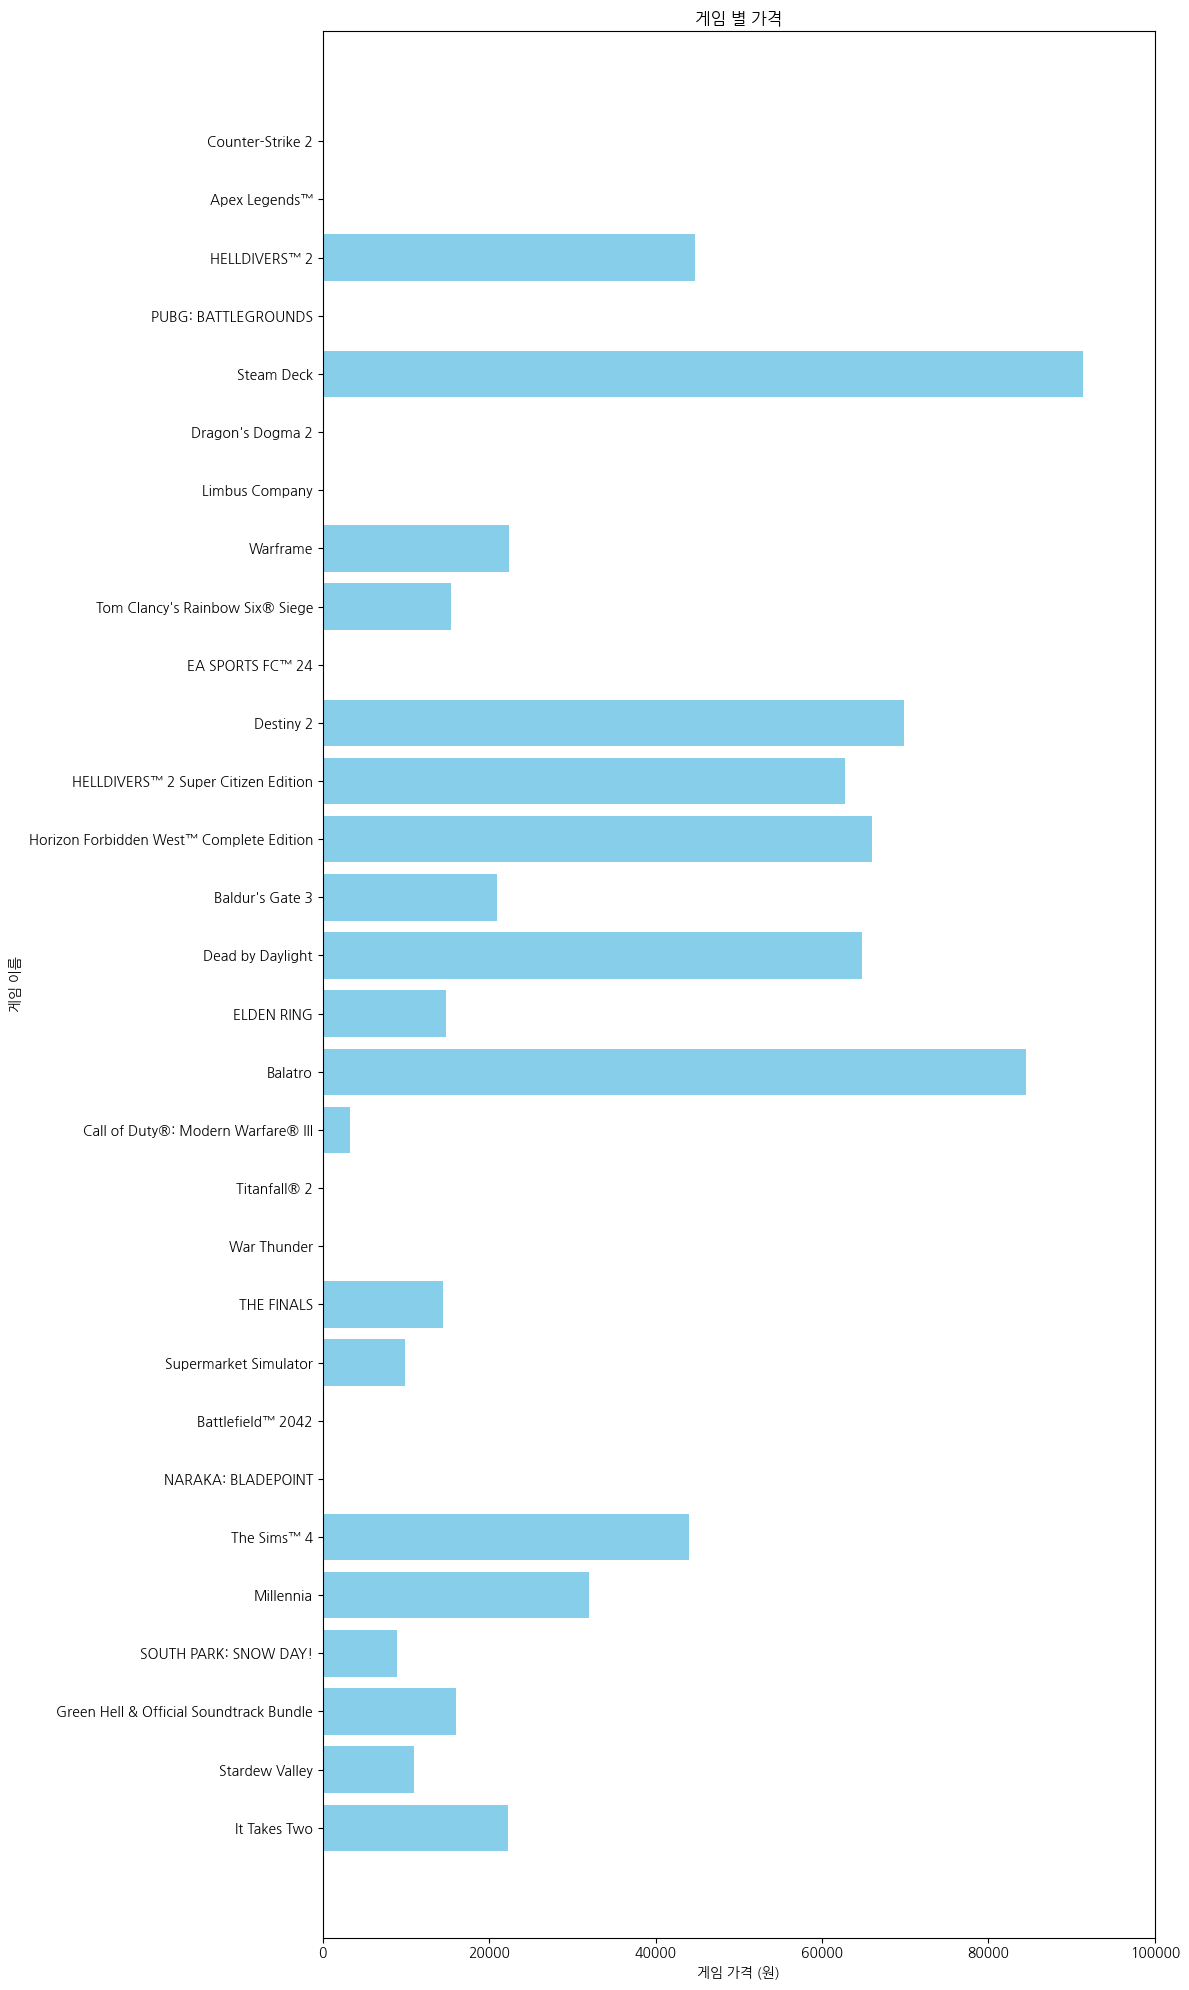

In [56]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'NanumGothic'

# 데이터 준비
games = jyj_data['게임 이름']
prices = jyj_data['게임 가격']



# 가격을 숫자로 변환하고 스케일링
price_values = []
for price in prices:
    if price == 'Free To Play' or price == 'Prepurchase':
        price_values.append(0)
    else:
        price_values.append(float(price.replace('₩', '').replace(',', '')))

# 그래프 생성
plt.figure(figsize=(12, 20))
plt.barh(games, price_values, color='skyblue')
plt.xlabel('게임 가격 (원)')
plt.ylabel('게임 이름')
plt.title('게임 별 가격')
plt.xlim(0, 100000)  # y 축 범위 설정
plt.gca().invert_yaxis()  # 그래프 방향 뒤집기
plt.tight_layout()  # 그래프 간격 조정
plt.show()

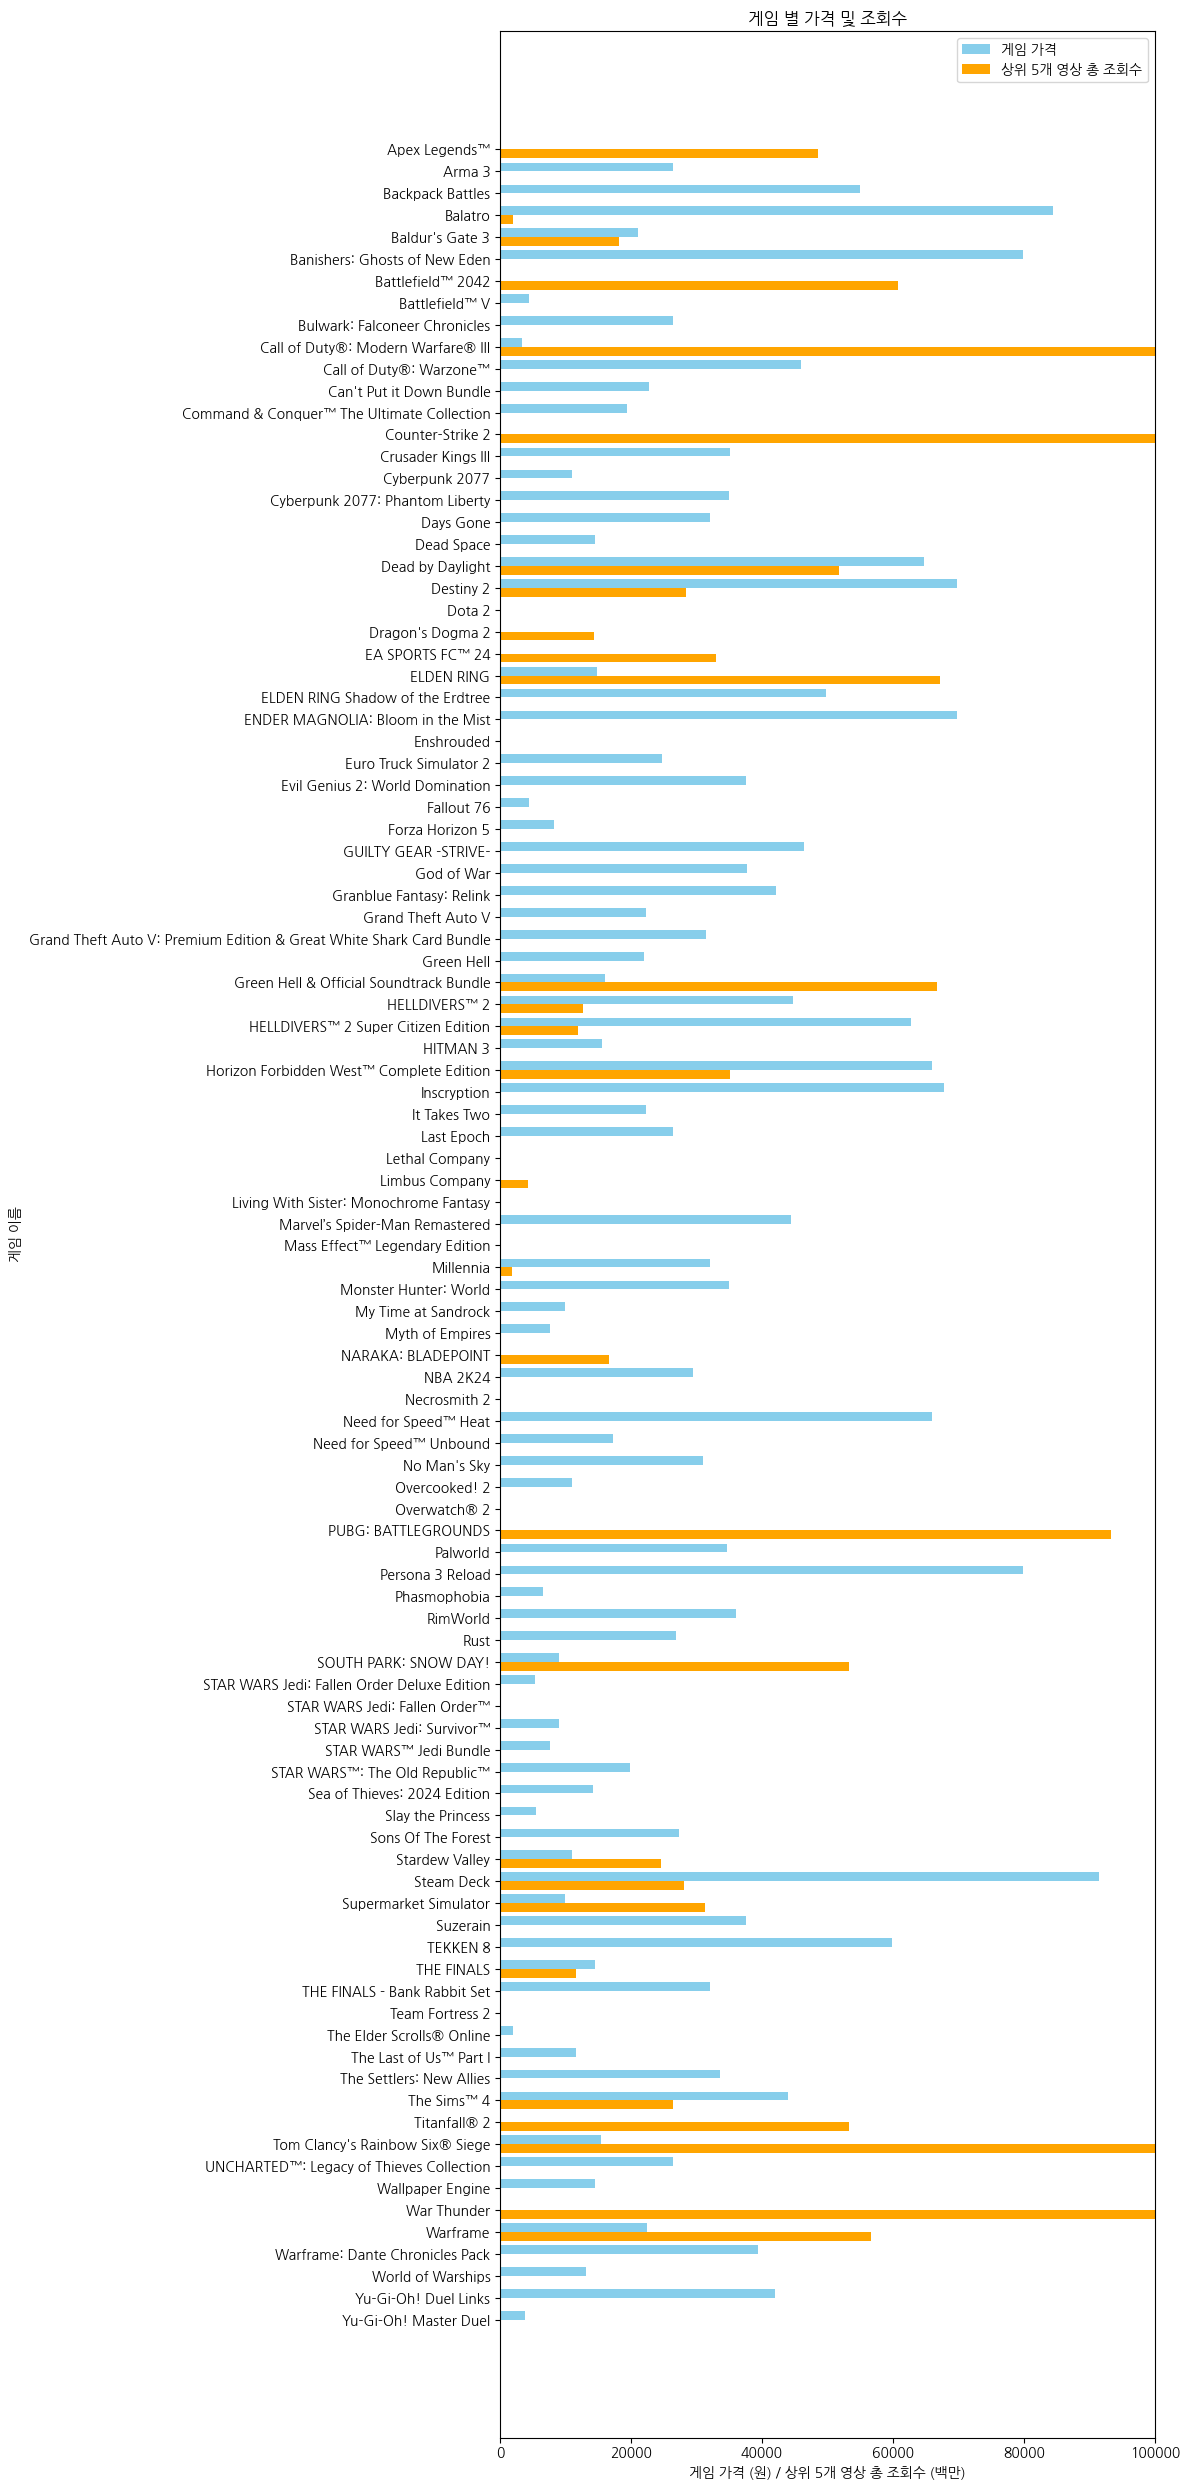

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'NanumGothic'

# 데이터 로드
jyj_data = pd.read_csv('../JYJ/steam_games_TopSeller_bak.csv', encoding='utf-8')
youtube_data = pd.read_csv('../KSH/youtube_games.csv', encoding='utf-8')

# 데이터 결합
merged_data = pd.merge(jyj_data, youtube_data, on='게임 이름', how='outer')

# 결측치가 아닌 데이터만 필터링
merged_data_filtered = merged_data.dropna(subset=['게임 가격'])

# 가격 및 조회수 처리 및 스케일링
price_values = []
for price in merged_data_filtered['게임 가격']:
    if price == 'Free To Play' or price == 'Prepurchase':
        price_values.append(0)
    else:
        price_values.append(float(price.replace('₩', '').replace(',', '')))

# 상위 5개 영상 총 조회수를 백만 단위로 변환
view_count_values = merged_data_filtered['상위 5개 영상 총 조회수'].fillna(0).astype(int) / 1000

# 그래프 생성
plt.figure(figsize=(12, 25))
bar_width = 0.4  # 막대의 너비
index = range(len(merged_data_filtered))
plt.barh(index, price_values, color='skyblue', height=bar_width, label='게임 가격')
plt.barh([i + bar_width for i in index], view_count_values, color='orange', height=bar_width, label='상위 5개 영상 총 조회수')
plt.yticks([i + bar_width / 2 for i in index], merged_data_filtered['게임 이름'])  # y 축 눈금 레이블 설정
plt.xlabel('게임 가격 (원) / 상위 5개 영상 총 조회수 (백만)')
plt.ylabel('게임 이름')
plt.title('게임 별 가격 및 조회수')
plt.xlim(0, 100000)  # y 축 범위 설정
plt.gca().invert_yaxis()  # 그래프 방향 뒤집기
plt.legend()
plt.tight_layout()  # 그래프 간격 조정
plt.show()

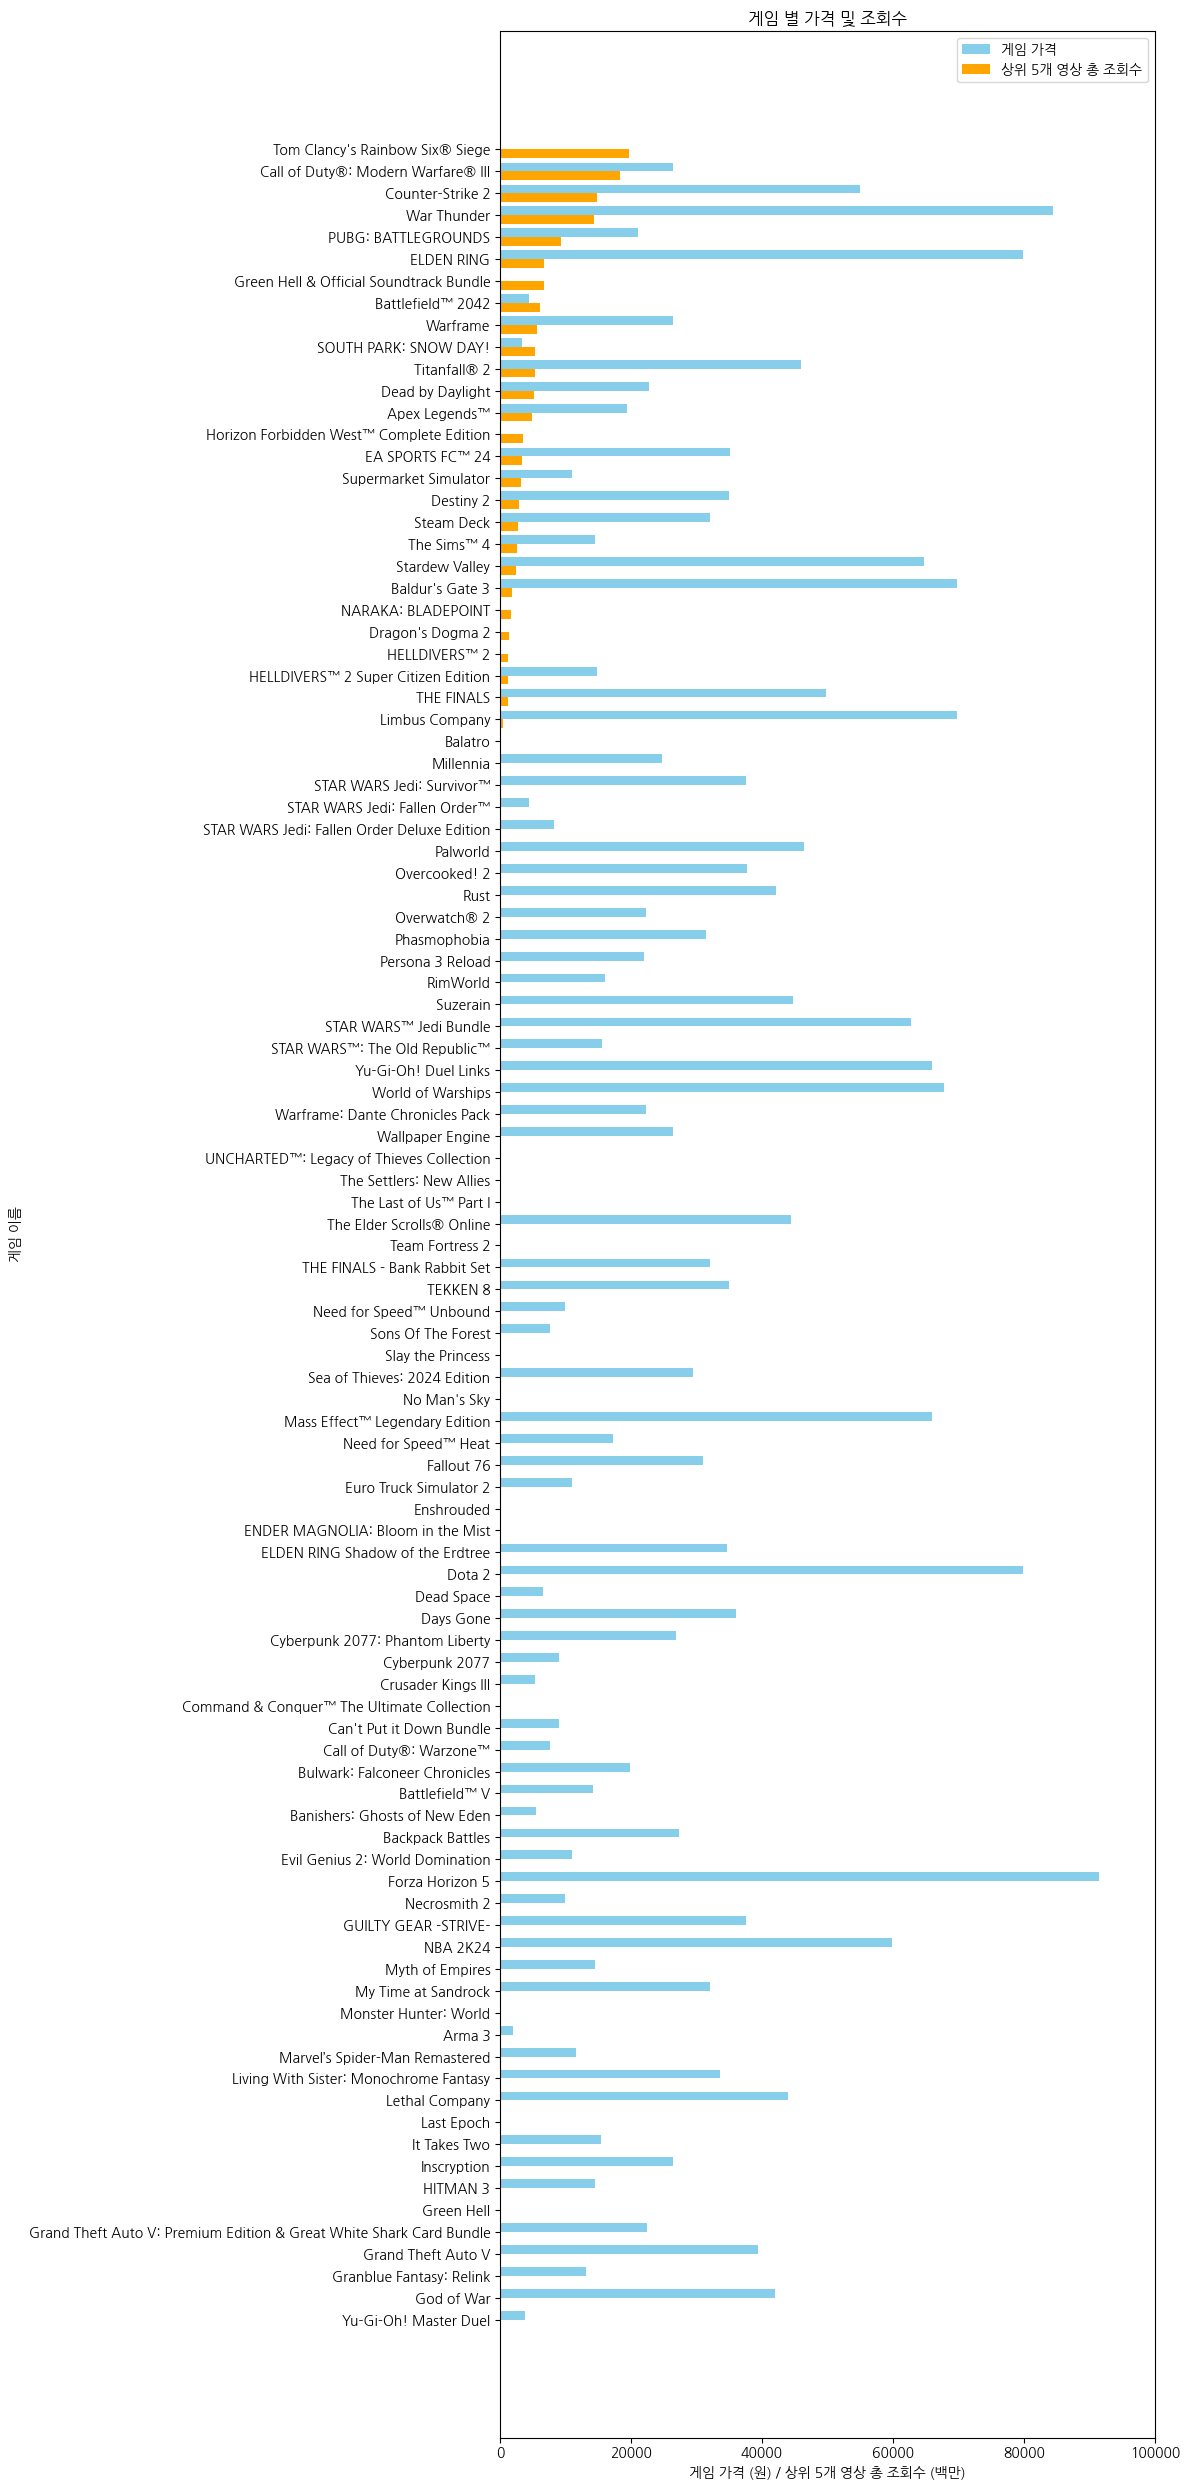

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'NanumGothic'

# 데이터 로드
jyj_data = pd.read_csv('../JYJ/steam_games_TopSeller_bak.csv', encoding='utf-8')
youtube_data = pd.read_csv('../KSH/youtube_games.csv', encoding='utf-8')

# 데이터 결합
merged_data = pd.merge(jyj_data, youtube_data, on='게임 이름', how='outer')

# 결측치가 아닌 데이터만 필터링
merged_data_filtered = merged_data.dropna(subset=['게임 가격'])

# 가격 및 조회수 처리 및 스케일링
price_values = []
for price in merged_data_filtered['게임 가격']:
    if price == 'Free To Play' or price == 'Prepurchase':
        price_values.append(0)
    else:
        price_values.append(float(price.replace('₩', '').replace(',', '')))

# 상위 5개 영상 총 조회수를 백만 단위로 변환
merged_data_filtered['상위 5개 영상 총 조회수'] = merged_data_filtered['상위 5개 영상 총 조회수'].fillna(0).astype(int) / 10000

# 조회수를 기준으로 데이터 정렬
sorted_data = merged_data_filtered.sort_values(by='상위 5개 영상 총 조회수', ascending=False)

# 그래프 생성
plt.figure(figsize=(12, 25))
bar_width = 0.4  # 막대의 너비
index = range(len(sorted_data))
plt.barh(index, price_values, color='skyblue', height=bar_width, label='게임 가격')
plt.barh([i + bar_width for i in index], sorted_data['상위 5개 영상 총 조회수'], color='orange', height=bar_width, label='상위 5개 영상 총 조회수')
plt.yticks([i + bar_width / 2 for i in index], sorted_data['게임 이름'])  # y 축 눈금 레이블 설정
plt.xlabel('게임 가격 (원) / 상위 5개 영상 총 조회수 (백만)')
plt.ylabel('게임 이름')
plt.title('게임 별 가격 및 조회수')
plt.xlim(0, 100000)  # y 축 범위 설정
plt.gca().invert_yaxis()  # 그래프 방향 뒤집기
plt.legend()
plt.tight_layout()  # 그래프 간격 조정
plt.show()

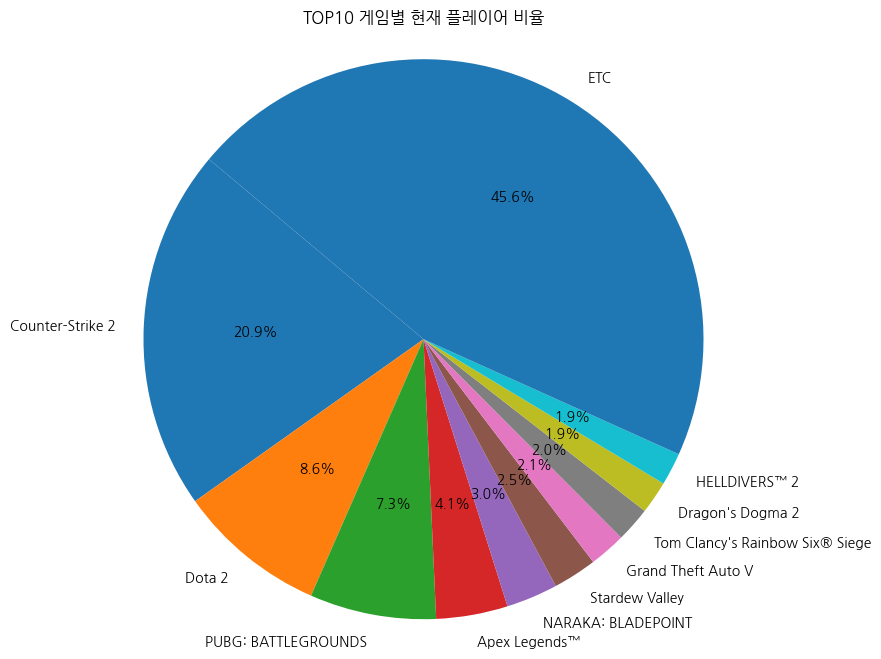

In [298]:

import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib

# CSV 파일 불러오기
jmk_data = pd.read_csv("steam_games.csv", encoding="utf-8")

# , 제거하기
jmk_data = jmk_data.replace(",", "", regex=True)

# 10번째 행부터 100번째 행까지 데이터 선택
etc_data = jmk_data.iloc[10:101]

# 'Current Players' 열 값 합산
etc_current_players = etc_data["Current Players"].astype(float).sum()
etc_peak_today = etc_data["Peak Today"].astype(float).sum()
# ETC 행 생성
etc_row = pd.DataFrame({"Game Name": ["ETC"], "Current Players": [etc_current_players], "Peak Today": [etc_peak_today]})

# ETC 데이터 제거
jmk_data = jmk_data.drop(jmk_data.index[10:101])

# jmk_data에 ETC 행 추가
jmk_data = jmk_data._append(etc_row, ignore_index=True)

# 'Game Name' 및 'Current Players' 열 추출
game_names = jmk_data["Game Name"]
current_players = jmk_data["Current Players"]
peak_today = jmk_data["Peak Today"]

# 파이 차트 생성
wedgeprops={'width': 7, 'edgecolor': 'w', 'linewidth': 50}
plt.figure(figsize=(10, 8))
plt.pie(current_players, labels=game_names, autopct='%1.1f%%', startangle=140)

# 차트 중심에 게임 이름 표시


plt.title("TOP10 게임별 현재 플레이어 비율")
plt.axis("equal")  # 차트를 동그라미로 만듦

plt.show()

In [299]:
current_players
peak_today

0       1491977
1        615009
2        637297
3        387994
4        289787
5        178483
6        144922
7        159673
8        133717
9        213859
10    3171524.0
Name: Peak Today, dtype: object

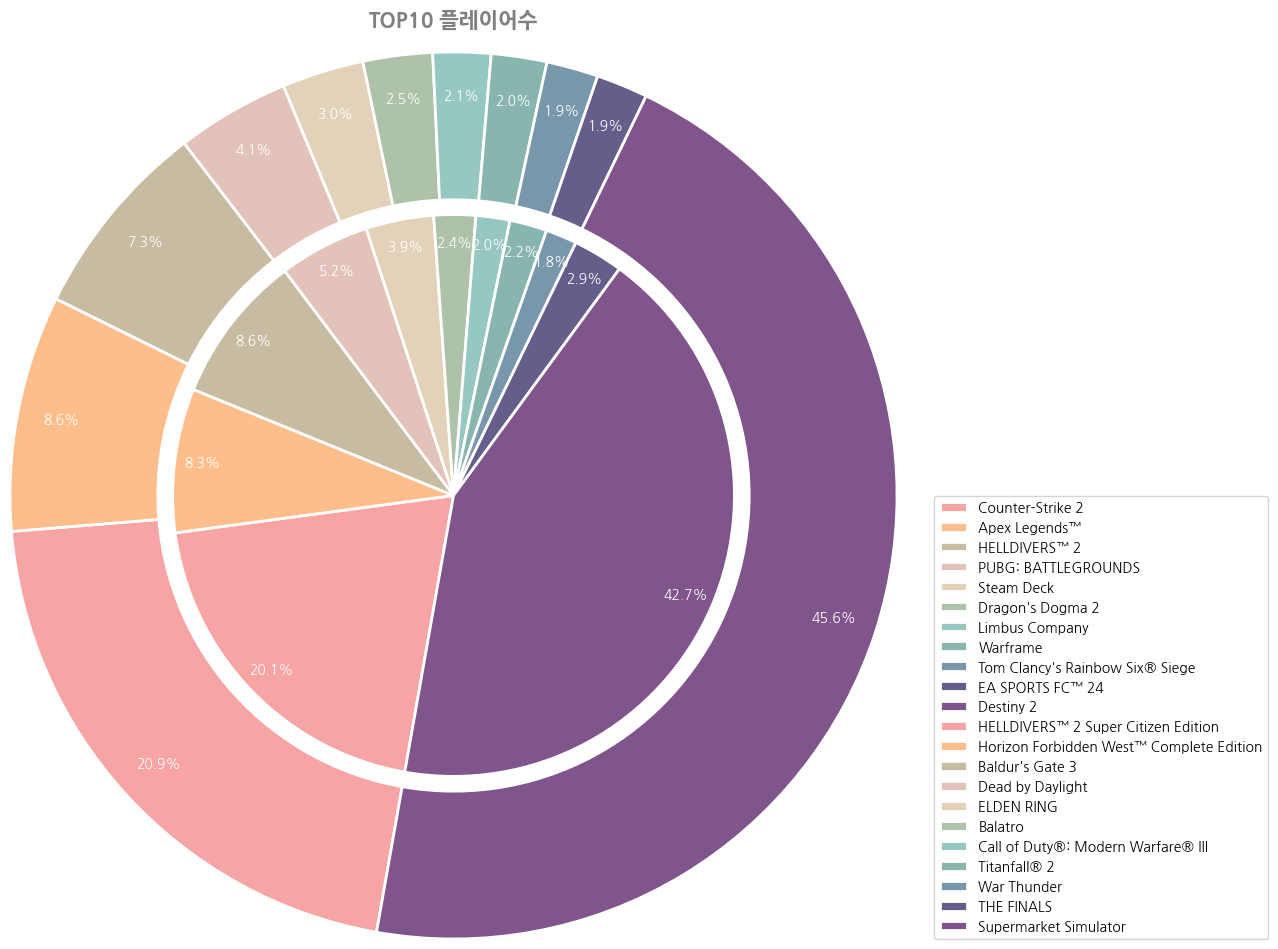

In [339]:
import matplotlib.pyplot as plt
import koreanize_matplotlib


colors = ['#F7A4A4', '#FEBE8C', '#C7BCA1', '#E2C2B9', '#E4D1B9', '#ADC2A9', '#96C7C1', '#89B5AF', '#7897AB', '#655D8A', '#80558C']
wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 2}
wedgepropsinner={'width': 1.9, 'edgecolor': 'w', 'linewidth': 2}


plt.pie(current_players, autopct='%.1f%%', pctdistance=0.9, textprops={'fontsize': 10, 'color':"w"}, startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops, radius=3)
plt.title("TOP10 플레이어수", loc="center", fontweight="bold", fontsize=15, pad=205, color="gray")

plt.pie(peak_today, autopct='%.1f%%', pctdistance=0.9, textprops={'fontsize': 10, 'color':"w"}, startangle=260, counterclock=False, colors=colors, wedgeprops=wedgepropsinner, radius=1.9 )
# 범례 위치 설정
plt.legend(game_names, loc=(1.8, -0.7))

plt.show()

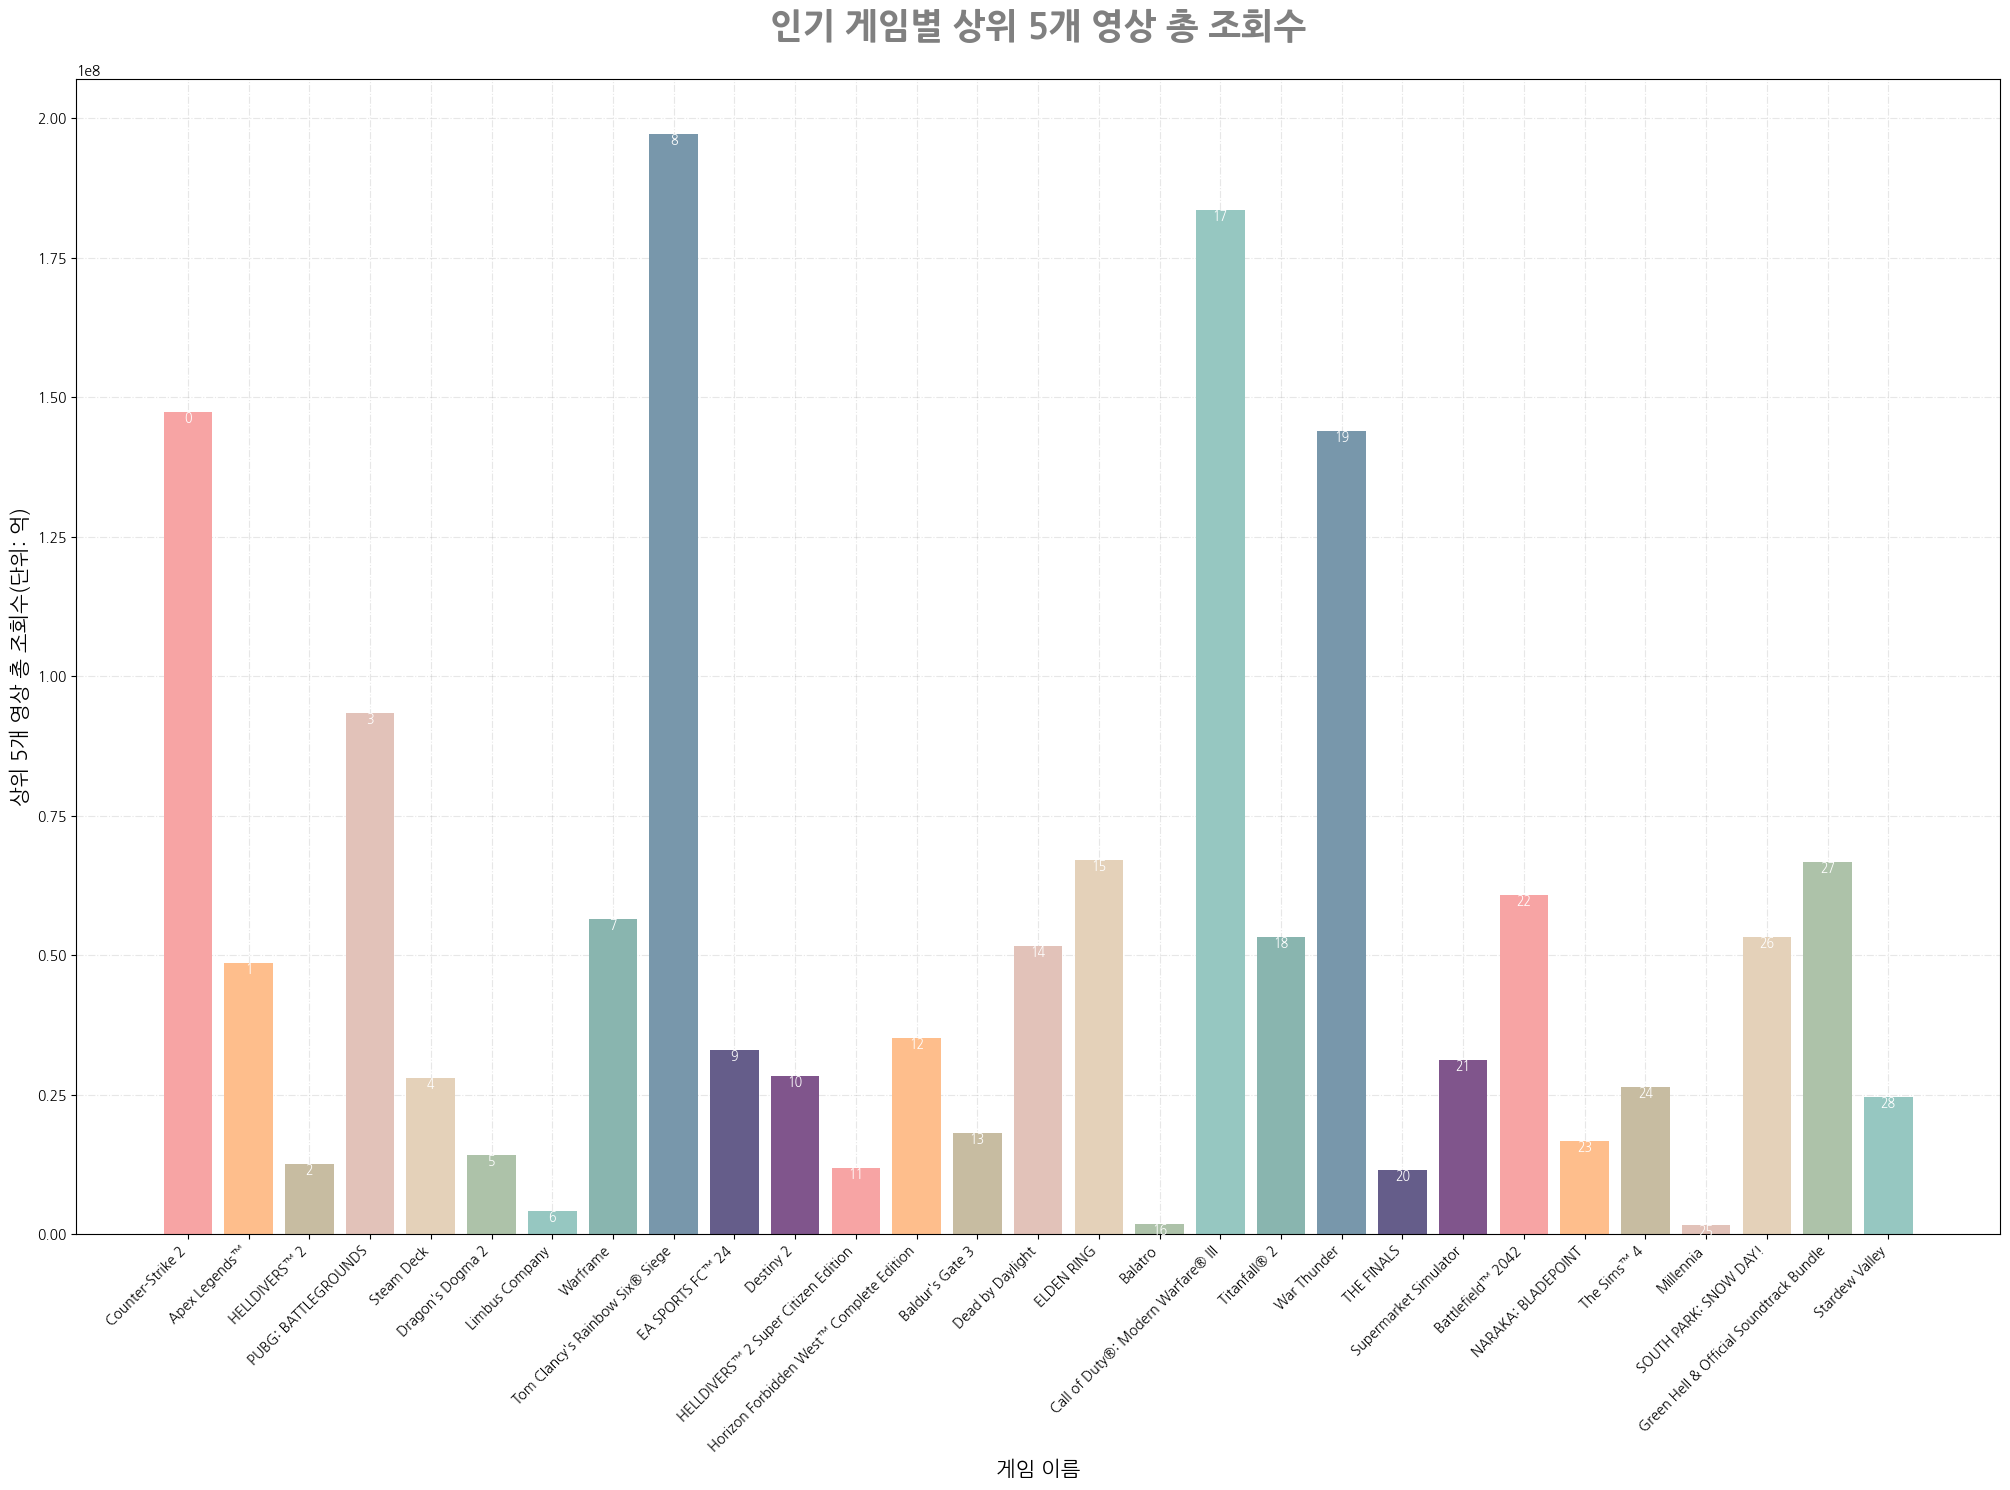

In [425]:
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib

# 데이터셋 불러오기
ksh_data=pd.read_csv("../KSH/youtube_games.csv", encoding="utf-8")


# 'Game Name' 및 'Current Players' 열 추출
game_names = merged_data["게임 이름"]
views = ksh_data["상위 5개 영상 총 조회수"]

# 그래프 크기 설정
plt.figure(figsize=(20.2, 15))  

colors =['#F7A4A4', '#FEBE8C', '#C7BCA1', '#E2C2B9', '#E4D1B9', '#ADC2A9', '#96C7C1', '#89B5AF', '#7897AB', '#655D8A', '#80558C']
# 막대 그래프 생성
plt.grid(True, linestyle='dashdot', alpha=0.3, zorder=1)  # 그리드 활성화 및 스타일 설정
bars = plt.bar(game_names, views, color=colors, zorder=2)

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(i), 
             ha='center', va='top', fontsize=9, color='white')
plt.xlabel('게임 이름', fontsize=15)  # x축 레이블 설정
plt.ylabel('상위 5개 영상 총 조회수(단위: 억)', fontsize=15)  # y축 레이블 설정
plt.title('인기 게임별 상위 5개 영상 총 조회수', fontweight="bold", fontsize=25, pad=30, color="gray")  # 그래프 제목 설정
plt.xticks(rotation=45, ha='right')  # x축 눈금 레이블 회전 및 정렬 설정
plt.tight_layout()  # 레이아웃 조정



plt.show()  # 그래프 출력